In [3]:
#Credit to: https://courses.cs.washington.edu/courses/cse446/18wi/sections/section8/XOR-Pytorch.html

import torch
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data, dtype=torch.float)

print(f"Ones Tensor: \n {x_ones} \n")
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0955, 0.7914],
        [0.2962, 0.3224]]) 



In [27]:
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

X = torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)


In [28]:
class XOR(nn.Module):
    def __init__(self,input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim,2)
        self.lin2 = nn.Linear(2,output_dim)
    
    def forward(self,x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        x = self.lin2(x)
        return x

In [7]:
model = XOR()

In [9]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [10]:
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

In [18]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point],requires_grad=False)
        y_var = Variable(Y[data_point],requires_grad=False)

        optimizer.zero_grad()
        y_hat = model(x_var) # predicted y's
        loss = loss_func.forward(y_hat,y_var)
        loss.backward()
        optimizer.step()
    
    if i% 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

c:\Users\Scott Hamilton\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0, Loss: 0.0341990701854229, 
Epoch: 500, Loss: 0.0038479745853692293, 
Epoch: 1000, Loss: 2.877698079828406e-13, 
Epoch: 1500, Loss: 1.2789769243681803e-13, 
Epoch: 2000, Loss: 1.7408297026122455e-13, 


In [19]:
model_params = list(model.parameters())

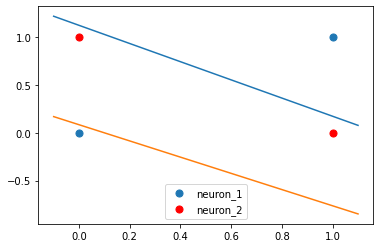

In [20]:
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1],0],X.numpy()[[0,-1],1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()

In [35]:
print(model(torch.tensor([1,1]).float()))

tensor([4.1723e-07], grad_fn=<AddBackward0>)
